<a href="https://colab.research.google.com/github/kenzou-eu/EP1/blob/main/EP_Num%C3%A9rico_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Início do programa


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
pi = math.pi

In [2]:
def ck(a, b, k):  #Aplica a fórmula de ck dada na página 3 do enunciado
    dividend = a[k]
    divisor = math.sqrt(pow(a[k], 2) + pow(b[k], 2))
    c = dividend/divisor
    return c

def sk(a, b, k): #Aplica a fórmula de sk dada na página 3 do enunciado
    dividend = -b[k]
    divisor = math.sqrt(pow(a[k], 2) + pow(b[k], 2))
    s = (dividend/divisor)
    return s

def sgn(d): #Identifica se  o valor de sgn é positivo ou negativo na Heurística de Wilkinson
    if d >=0:
        return 1
    else:
        return -1

def dk(alfa, n): #Encontra o valor de dk para ser usado na heurística de wilkinson
    valuedk = (alfa[n-1] - alfa[n])/2
    return valuedk

def uk(alfa, beta, d, n, k, desloc): #Aplica a Heurística de wilkinson para encontrar o valor de uk
    if k!= 0 and desloc == "S": 
      valueuk = alfa[n] + dk(alfa, n) - sgn(d)*(math.sqrt(pow(dk(alfa,n), 2) + pow(beta[n-1],2))) #alfa(i,k) é o coeficiente i da diagonal principal da matriz A na interação k, beta é da outra diagonal
      return valueuk
    if k==0 or desloc == "N": #O valor de uk para k=0 ou quando o QR é sem deslocamento é sempre zero de acordo com o algorítmo apresentado na página 7 do enunciado
      return 0

def matA(n): #Constroi a matriz contendo a diagonal principal da matriz através de inputs do usuário
    A = []
    for i in range(n):
        if i==0:
            a=float(input('Digite o primeiro elemento da diagonal principal:'))
            A.append(a)
        else:
            a=float(input('Digite o próximo elemento da diagonal principal:'))
            A.append(a)
    return A

def matB(n): #Constroi a matriz contendo a subdiagonal da matriz através de inputs do usuário
    B = []
    for i in range(n-1):
        if i==0:
            b=float(input('Digite o primeiro elemento da sub-diagonal: '))
            B.append(b)
        else:
            b=float(input('Digite o próximo elemento da sub-diagonal: '))
            B.append(b)
    return B

def v(n): #Cria uma matriz com zeros para fazer a identidade
    v0=[]
    for i in range(n):
        v0.append(0)
    return(v0)

def handleV(n): #usa a função acima para criar uma matriz identidade do tamanho pedido
  V=[]
  for i in range(n):
      V.append(v(n))
  for i in range(n):
      V[i][i]=1
  return V



In [3]:
def metodoQR(n, A, B, V, erro, desloc):
    n0=n
    A0=[]
    B0=[]
    k = 0
    for i in range(n0-2,-1,-1):
        while abs(B[i]) > erro:
            cos = []
            sen = []
            C=[]
            for j in range(n-1):
                C.append(B[j])
            valueDK = dk(A, n-1)
            valueUK = uk(A, B, valueDK, n-1, k, desloc)
            for j in range(n):
                A[j] = A[j] - valueUK
            for q in range(n-1):
                if q != (n-2):
                    cos.append(ck(A,B,q))
                    sen.append(sk(A,B,q))
                    A.insert(q+1,(cos[q]*A[q]-sen[q]*B[q]))
                    A.pop(q)
                    A.insert(q+2,(sen[q]*C[q]+cos[q]*A[q+1]))
                    C.insert(q+1,(cos[q]*C[q]-sen[q]*A[q+1]))
                    A.pop(q+1)
                    C.pop(q)
                    C.insert(q+2,(cos[q]*C[q+1]))
                    C.pop(q+1)
                if q == (n-2):
                    cos.append(ck(A,B,q))
                    sen.append(sk(A,B,q)) 
                    A.insert(q+1,(cos[q]*A[q]-sen[q]*B[q]))
                    A.pop(q)
                    A.insert(q+2,(sen[q]*C[q]+cos[q]*A[q+1]))
                    C.insert(q+1,(cos[q]*C[q]-sen[q]*A[q+1]))
                    A.pop(q+1)
                    C.pop(q)
            for q in range(n-1):
                A.insert(q+1,(cos[q]*A[q]-sen[q]*C[q]))
                A.pop(q)
                A.insert(q+2,(cos[q]*A[q+1]))
                B.insert(q+1,(-sen[q]*A[q+1]))
                A.pop(q+1)
                B.pop(q)
                for m in range(n0):
                    V[m].insert(q+1,(cos[q]*V[m][q]-sen[q]*V[m][q+1]))
                    V[m].insert(q+3,(sen[q]*V[m][q]+cos[q]*V[m][q+2]))
                    V[m].pop(q)
                    V[m].pop(q+1)
            for j in range(n):
                A[j] = A[j] + valueUK
            k = k+1
        if i!=0:                    ##Processo de 
            A0.insert(0,A[n-1])      ## redução das matrizes
            B0.insert(0,B[n-2])
            A.pop(n-1)
            B.pop(n-2)
            n=n-1
        if i==0:
            A0.insert(0,A[n-1])
            A0.insert(0,A[n-2])
            B0.insert(0,B[n-2])
    A=A0
    B=B0
    return A, B, V, k

# **Teste A**

In [6]:
def ExA():
  desloc = input("Deseja realizar o QR com deslocamento? (S/N) ") #Pergunta ao usuário se ele deseja realizar o QR com deslocamento ou não, se receber uma resposta diferente de S ou N ele volta em loop
  if desloc == "S" or desloc == "N":
    inputValue = input("Deseja inputar os valores da matriz trigiagonal? (S/N) ")
    
    if inputValue == "S": #Pedindo para inputar os valores, chama as funções que constroem a matriz manualmente e depois chama a função QR para resolver
      n = int(input("Qual a ordem da Matriz? ")) #tamanho da matriz
      A = matA(n) #cria um vetor com os elementos da diagonal principal
      B = matB(n) #cria um vetor com os elementos da sub-diagonal 
      erro = float(input("Qual o valor do erro? Digite na forma 1.0e-6 "))
      V = handleV(n)

      A, B, V, k = metodoQR(n, A, B, V, erro, desloc)
      print("O numero de interações foi: ", k, end='\n\n')
      
      print('A =',A, end='\n\n')
      print('V =')
      for i in range(n):
          print(V[i])
    elif inputValue == "N": #Caso o usuário não queira inputar, ele constrói a matriz de acordo com as informações do enunciado
      n = int(input("Qual a ordem da Matriz? ")) #tamanho da matriz
      erro = float(1.0e-6)
      A = []
      for i in range(n):
        A.append(2)         #Diagonal principal sempre 2
      B = []
      for i in range(n-1):
        B.append(-1)          #Subdiagonal igual a -1
     
      V = handleV(n)

      A, B, V, k = metodoQR(n, A, B, V, erro, desloc)
      print("\nO numero de interações foi: ", k, end='\n\n')
      
      print('A =',A, end='\n\n')
      print('V =')
      for i in range(n):
          print(V[i])
    else:
      print("\nO valor inserido não é válido, tente novamente:", end='\n\n')
      ExA()
   
  else: 
    print("\nO valor inserido não é válido, tente novamente:", end='\n\n')
    ExA()
    


Deseja realizar o QR com deslocamento? (S/N) S
Deseja inputar os valores da matriz trigiagonal? (S/N) N
Qual a ordem da Matriz? 4

O numero de interações foi:  7

A = [3.6180339887498962, 2.6180339887498953, 1.381966011250106, 0.38196601125010526]

V =
[0.3717480344601847, 0.6015009550075463, 0.601500955007545, 0.3717480344601846]
[-0.6015009550075459, -0.37174803446018384, 0.3717480344601851, 0.601500955007546]
[0.6015009550075456, -0.3717480344601851, -0.37174803446018395, 0.6015009550075457]
[-0.37174803446018434, 0.6015009550075447, -0.6015009550075466, 0.37174803446018456]


# **Exercício B**

Deseja inserir valores de n e X(0)? (S/N) N
Qual teste você deseja rodar? 1: X(0) = [-2, -3, -3, -3, -1], 2: X(0) = [1, 10, -4, 3, -2], 3: X(0) = modo de maior frequência 1
Você escolheu o teste com X(0) = [-2, -3, -3, -3, -1]

A frequência com valor:  
9.404520488593056
Tem os modos de vibração: 
0.1893346573107501, -0.3911052075280567, 0.5576611077554171, -0.5882019988349073, 0.3927105825529496, 


A frequência com valor:  
8.373400213205445
Tem os modos de vibração: 
0.47497610428602555, -0.585382812847187, 0.18485786148930244, 0.38295963757809504, -0.5008933517347195, 


A frequência com valor:  
6.839092508517442
Tem os modos de vibração: 
0.5988223982052636, -0.10270311331950038, -0.5648687392563424, 0.09308548584215634, 0.5505653509426998, 


A frequência com valor:  
4.837213366656602
Tem os modos de vibração: 
0.5325039524890145, 0.4744456963356219, -0.0637570182596996, -0.5173751580266018, -0.468613711164926, 


A frequência com valor:  
2.5038657620774534
Tem os modos de vib

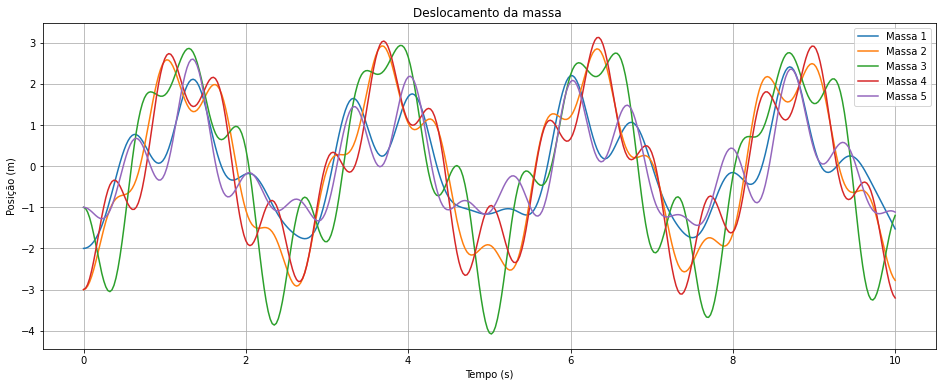

In [40]:
def k(i): #Fórmula para calcular os valores de k dado no enunciado do exercício B
    ki = (40 + 2*i)
    return ki

def mainDiag(n,m): #Função cria uma lista com os valores da diagonal principal
    A=[]
    for i in range(1,n+1):
        a = (k(i) + k(i+1))/m
        A.append(a)
    return A

def subDiag(n,m): #Função cria uma lista com os valores da subdiagonal
    B = []
    for i in range(2,n+1):
        b = -k(i)/m
        B.append(b)
    return B

def handley0(x0, V): #Utiliza os valores de X(0) para calcular os valores de Y(0) através da relação Y = QtX
    Vt = np.transpose(V)
    y0 = np.dot(Vt, x0)
    return y0

def functionY(t, a, n, A, Y): #Aplica a solução geral da equação para encontrar todos os valores de Y
  Y = []
  for i in range(n): #Solução geral para todos as massas dado um tempo t
    y = a[i]*math.cos(math.sqrt(A[i])*t) 
    Y.append(y)
  return Y

def functionX(t, a, n, j, A, V, Y): #Usa da relação X = QY para encontrar todos os valores de X
    Y = functionY(t, a, n, A, Y)
    X = np.dot(V[j], Y)
    return X

def plotGraphs(eixo_x, eixo_y, A, V, n, j):  #Função que pega as informações obtidas para plotar o gráfico de deslocamento da massa em função do tempo
  labely = f"Massa {j + 1}"  
  plt.plot(eixo_x, eixo_y, label = labely)
  plt.grid() 
  plt.legend()
  fig = plt.gcf()
  fig.set_size_inches(16,6)
  title = "Deslocamento da massa " 
  plt.title(title)
  plt.xlabel('Tempo (s)')
  plt.ylabel('Posição (m)')
  print("A frequência com valor:  ")
  print(np.sqrt(A[j]))
  print("Tem os modos de vibração: ")
  for i in range(n):
    print(V[i][j], end=", ")
  print('\n\n')
  
def solve(t, value_a, n, A, V, x0): #Função que resolve o exercício, a partir dos valores dados no enunciado
  eixo_x = np.arange(0, 10.025, 0.025) #Período de 10s e passo de 0.025

  for j in range(n):
    eixo_y = []
    eixo_y.append(x0[j]) #Pega o ponto inicial de X dado no enunciado
    Y =[]
    for i in range(1, len(eixo_x)):
      xi = functionX(eixo_x[i], value_a, n, j, A, V, Y)  #Calcula o valor de X no tempo i dado no range acima
      eixo_y.append(xi)
    plotGraphs(eixo_x, eixo_y, A, V, n, j)

def testeB1(n, t, A, V): #Função que resolve o exercício usando os valores do primeiro teste
  x0 = [-2, -3, -1, -3, -1]
  y0 = handley0(x0, V)
  value_a = y0.copy() #Temos que a é sempre igual o valor de y(0) e b é sempre zero devido a velocidade inicial nula
  solve(t, value_a, n, A, V, x0) 

def testeB2(n, t, A, V): #Função que resolve o exercício usando os valores do segundo teste
  x0 = [1, 10, -4, 3, -2]
  y0 = handley0(x0, V)
  value_a = y0.copy() #Temos que a é sempre igual o valor de y(0) e b é sempre zero devido a velocidade inicial nula
  solve(t, value_a, n, A, V, x0)

def testeB3(n, t, A, V): #Função que resolve o exercício usando os valores do terceiro teste
  index = np.argmax(A) #Encontramos o maior valor entre os autovalores,
  x0 = []
  for i in range(n): # e pegamos o autovetor respectivo
    x0.append(V[i][index])
  print("O X(0) é: ", x0)
  y0 = handley0(x0, V)
  value_a = y0.copy() #Temos que a é sempre igual o valor de y(0) e b é sempre zero devido a velocidade inicial nula
  solve(t, value_a, n, A, V, x0)

def testeInput(n, t, A, V, x0): #Função que resolve o exercício usando os valores inputados pelo usuário
  print("O X(0) é: ", x0)
  y0 = handley0(x0, V)
  value_a = y0.copy()
  solve(t, value_a, n, A, V, x0)

def ExB():
  inputValue = input("Deseja inserir valores de n e X(0)? (S/N) ")
  if inputValue == "N":
    n = 5 #Quantidade de massas
    m = 2 #Massa das massas
    desloc = "S"
    t = 10 #tempo em segundos
    erro = 1.0e-6 #Assumimos o erro sendo igual ao do exercício A por ser suficiente para a solução
    V = handleV(n)
    A = mainDiag(n,m)
    B = subDiag(n,m)
    A, B, V, k = metodoQR(n, A, B, V, erro, desloc)
    teste = int(input("Qual teste você deseja rodar? 1: X(0) = [-2, -3, -3, -3, -1], 2: X(0) = [1, 10, -4, 3, -2], 3: X(0) = modo de maior frequência "))
    if teste == 1:
      print("Você escolheu o teste com X(0) = [-2, -3, -3, -3, -1]", end='\n\n')
      testeB1(n, t, A, V)
    elif teste == 2:
      print("Você escolheu o teste com X(0) = [1, 10, -4, 3, -2]", end='\n\n')
      testeB2(n, t, A, V)
    elif teste == 3:
      print("Você escolheu o teste com X(0) = modo de maior frequência", end='\n\n')
      testeB3(n, t, A, V)
    else:
      print("Esse valor de teste não é válido, tente novamente: ", end='\n\n')
      ExB()
  elif inputValue == "S":
    desloc = "S"
    t = 10 #tempo em segundos
    erro = 1.0e-6
    m = 2 #Massa das massas
    
    n = int(input("Qual a ordem da Matriz? "))
    x0 = []
    for i in range(n):
      if i == 0:
        x = int(input("Digite o primeiro valor de X(0): "))
        x0.append(x)
      else:
        x = int(input("Digite o próximo valor de X(0): "))
        x0.append(x)
    V = handleV(n)
    A = mainDiag(n,m)
    B = subDiag(n,m)
    A, B, V, k = metodoQR(n, A, B, V, erro, desloc)
    testeInput(n, t, A, V, x0)
  else: 
    print("\nO valor inserido não é válido, tente novamente:", end='\n\n')
    ExB()
  

# **Teste C**

Qual teste você deseja rodar? 1: X(0) = [-2, -3, -3, -3, -1], 2: X(0) = [1, 10, -4, 3, -2], 3: X(0) = modo de maior frequência 1
Você escolheu o teste com X(0) =  [-2, -3, -1, -3, -1, -2, -3, -1, -3, -1]
A frequência com valor:  
8.62906327461741
Tem os modos de vibração: 
0.12013116587856816, -0.23053001914526428, 0.32225270127551414, -0.38786838605918356, 0.42206128094626433, -0.42206128094636736, 0.3878683860590827, -0.32225270127558847, 0.230530019145202, -0.12013116587859518, 


A frequência com valor:  
8.364665818045866
Tem os modos de vibração: 
0.23053001914526872, -0.38786838605906154, 0.422061280946414, -0.3222527012754292, 0.1201311658787069, 0.12013116587871422, -0.32225270127543415, 0.4220612809464166, -0.38786838605906354, 0.23053001914527022, 


A frequência com valor:  
7.92998788712321
Tem os modos de vibração: 
0.32225270127547134, -0.4220612809464695, 0.23053001914501622, 0.12013116587832484, -0.3878683860594144, 0.3878683860588523, -0.12013116587883942, -0.23053001

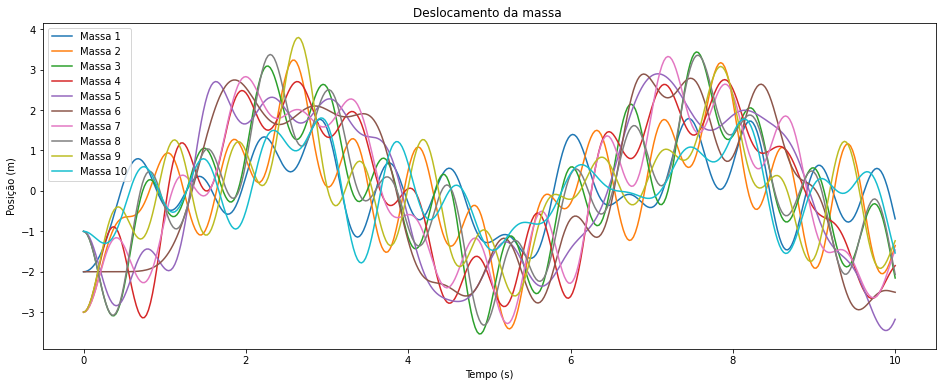

In [41]:
def kC(i):  #Fórmula para calcular os valores de k dado no enunciado do exercício C
    ki = (40 + 2*pow(-1,1))
    return ki

def mainDiagC(n,m): #Constrói a diagonal principal do exercicio C
    A=[]
    for i in range(1,n+1):
        a = (kC(i) + kC(i+1))/m
        A.append(a)
    return A

def subDiagC(n,m): #Constroi a subdiagonal do exercício C
    B = []
    for i in range(2,n+1):
        b = -kC(i)/m
        B.append(b)
    return B

def handleX0(x0): #Usa da definição de X(0) dada no enunciado para criar o X(0) para um n = 10
  for i in range(len(x0)):
    x0.append(x0[i])
  return x0


def testeC1(n, t, A, V): #Resolve o teste 1 para n=10 com as especificações do enunciado
  x0 = [-2, -3, -1, -3, -1]
  newx0 = handleX0(x0)
  print("Você escolheu o teste com X(0) = ", newx0)
  y0 = handley0(newx0, V)
  value_a = y0.copy()
  solve(t, value_a, n, A, V, x0)

def testeC2(n, t, A, V): #Resolve o teste 2 para n=10 com as especificações do enunciado
  x0 = [1, 10, -4, 3, -2]
  newx0 = handleX0(x0)
  print("Você escolheu o teste com X(0) = ", newx0)
  y0 = handley0(newx0, V)
  value_a = y0.copy()
  solve(t, value_a, n, A, V, x0)

def testeC3(n, t, A, V): #Resolve o teste 3 para n=10 com as especificações do enunciado
  index = np.argmax(A) #Encontra o maior valor entre os autovalores
  x0 = []
  for i in range(n): #Pegamos o autovetor respectivo do autovalor encontrado acima
    x0.append(V[i][index])
  print("O X(0) é: ", x0)
  y0 = handley0(x0, V)
  value_a = y0.copy()
  solve(t, value_a, n, A, V, x0)


def ExC():
  n = 10 #Quantidade de massas
  m = 2 #Massa das massas
  desloc = "S"
  t = 10 #tempo em segundos
  erro = 1.0e-6
  V = handleV(n)
  A = mainDiagC(n,m)
  B = subDiagC(n,m)
  A, B, V, k = metodoQR(n, A, B, V, erro, desloc)
  teste = int(input("Qual teste você deseja rodar? 1: X(0) = [-2, -3, -3, -3, -1], 2: X(0) = [1, 10, -4, 3, -2], 3: X(0) = modo de maior frequência "))
  if teste == 1:
    testeC1(n, t, A, V)
  elif teste == 2:
    testeC2(n, t, A, V)
  elif teste == 3:
    print("Você escolheu o teste com X(0) = modo de maior frequência")
    testeC3(n, t, A, V)
  else:
    print("Esse valor de teste não é válido, tente novamente: ")
    ExC()


# **New Section**

In [18]:
def main():
  ex = str(input("Qual exercício deseja fazer (A, B ou C)? "))

  if ex == "A":
    ExA()
  elif ex == "B":
    ExB()
  elif ex == "C":
    ExC()
  else:
    print("Essa opção não é valida, tente novamente: ")
    main()
main()

Qual exercício deseja fazer (A, B ou C)? A
Deseja realizar o QR com deslocamento? (S/N) N
Deseja inputar os valores da matriz trigiagonal? (S/N) N
Qual a ordem da Matriz? 4

O numero de interações foi:  45

A = [3.618033988749299, 2.618033988750194, 1.3819660112503, 0.38196601125020874]

V =
[0.37174849762817147, 0.6015009632417645, 0.6015007800181698, 0.3717478411073291]
[-0.6015012413974453, -0.3717473891908213, 0.3717484098714554, 0.6015008353985759]
[0.6015006687553335, -0.371748679910119, -0.37174765882497113, 0.6015010745045456]
[-0.37174757106861556, 0.6015009466610354, -0.6015011301350405, 0.3717482279940717]
